# Proyecto Cyber Attacks Detection - Parte I
### Autor: Jorge Aguirre

## Introducción:

_En el contexto de la ciberseguridad, donde la proliferación de ciberataques es cada vez más común, surge la necesidad de proteger estas redes contra éstas amenazas. Este proyecto de Data Science busca analizar conjuntos de datos de tráfico IoT e IIoT._

## Objetivo:

##### Nuestro objetivo principal es desarrollar un modelo de detección de intrusiones capaz de identificar y bloquear automáticamente actividades maliciosas en tiempo real. Al integrar este modelo en dispositivos de seguridad de borde, como firewalls, se espera mejorar la eficiencia de los sistemas de seguridad y proteger mejor las redes contra ataques cibernéticos. Todo gracias a ésta detección que nos proveerá el modelo. #####

## Hipótesis:
+ Como disponemos de la información del protocolo de cada paquete, esperamos que los protocolos más atacados sean TCP y UDP por ser los más populares.
+ En base al siguiente artículo esperamos encontrar a DoS como el tipo de ataque que más se nos presente en el dataset:
> **10 Most Common Types of Cyber Attacks Today** [Link](https://www.crowdstrike.com/cybersecurity-101/cyberattacks/most-common-types-of-cyberattacks/)
+ Respecto a las pérdidas de paquetes y retransmisiones esperamos que aumenten debido a la distorsión introducida por los ataques.

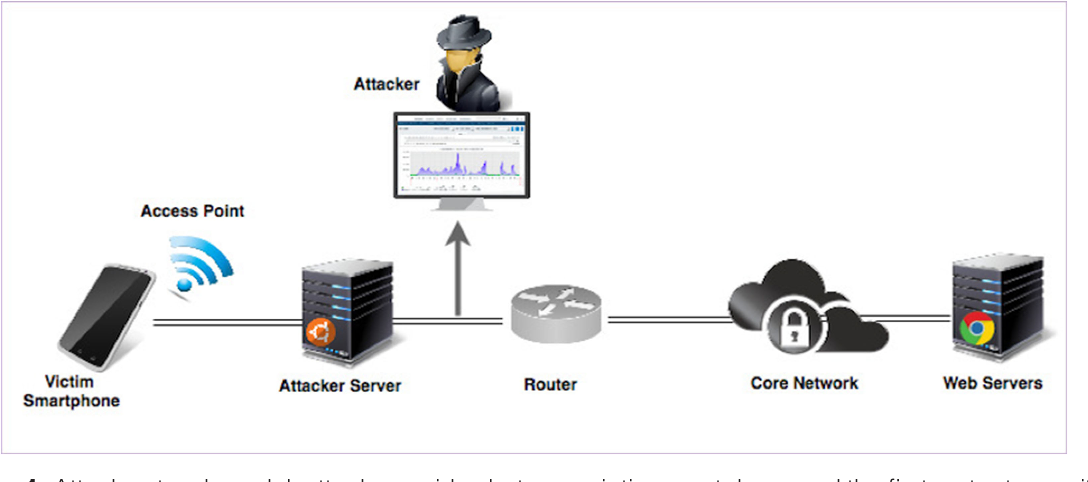

## Importación y Adaptación de datos
Se parte de un dataset generado especialmente en laboratorio para éste fin particular.

### Importación:
+ Primero se importa con configuración automática para verificar los campos.
+ Se establece un formato para cada campo a partir de la fuente del dataset.
+ Al definir los formatos saltaron errores que se solucionaron al cambiar a str algunos campos.
+ Esto permitió detectar cuales fueron esos campos con datos fuera de formato.
+ Se eliminaron esas filas problemáticas por no incidir porcentualmente en el dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Función para importar y modificar un archivo CSV
def importar_archivo(path):
        pd.set_option('display.max_columns', None)

        #base=''
        base='C:\\Users\\jorge\\DScience\\DataSet\\UNSW-NB15\\CSV Files\\'
        #base='..\..\..\DScience\DataSet\TON-IoT\Processed_datasets\Processed_IoT_dataset\'
        #Estoy en: 'C:\Users\jorge\Documents\Repo\DSI'

        path=1
        if path == 1:
            file_path = base + 'UNSW-NB15_1.csv'
        elif path == 2:
            file_path = base + 'UNSW-NB15_2.csv'
        elif path == 3:
            file_path = base + 'UNSW-NB15_3.csv'
        else:
            file_path = base + 'UNSW-NB15_4.csv'

        #file1 = pd.read_csv(file_path1, header=0, names=headers, parse_dates=parse_dates, na_values=na_values)

        # Define un diccionario de tipos de datos
        dtype_mapping = {
            'srcip': str,
            'sport': str,
            'dstip': str,
            'dsport': str,
            'proto': str,
            'state': str,
            'dur': float,
            'sbytes': int,
            'dbytes': int,
            'sttl': int,
            'dttl': int,
            'sloss': int,
            'dloss': int,
            'service': str,
            'Sload': float,
            'Dload': float,
            'Spkts': int,
            'Dpkts': int,
            'swin': int,
            'dwin': int,
            'stcpb': int,
            'dtcpb': int,
            'smeansz': int,
            'dmeansz': int,
            'trans_depth': int,
            'res_bdy_len': int,
            'Sjit': float,
            'Djit': float,
            'Stime': int,
            'Ltime': int,
            'Sintpkt': float,
            'Dintpkt': float,
            'tcprtt': float,
            'synack': float,
            'ackdat': float,
            'is_sm_ips_ports': np.bool_,  # Usamos np.bool_ en lugar de bool
            'ct_state_ttl': int,
            'ct_flw_http_mthd': int,
            'is_ftp_login': np.bool_,  # Usamos np.bool_ en lugar de bool
            'ct_ftp_cmd': int,
            'ct_srv_src': int,
            'ct_srv_dst': int,
            'ct_dst_ltm': int,
            'ct_src_ltm': int,
            'ct_src_dport_ltm': int,
            'ct_dst_sport_ltm': int,
            'ct_dst_src_ltm': int,
            'attack_cat': str,
            'Label': str
        }
        # Define los nombres de las columnas y sus tipos de datos
        headers = ['srcip','sport','dstip','dsport','proto','state','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','service','Sload','Dload','Spkts','Dpkts','swin','dwin','stcpb','dtcpb','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit','Stime','Ltime','Sintpkt','Dintpkt','tcprtt','synack','ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login','ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','attack_cat','Label']
        file1 = pd.read_csv(file_path, header=0, names=headers, dtype=dtype_mapping)
    
        return file1

In [3]:
archivo1=importar_archivo(1)
archivo2=importar_archivo(2)
archivo3=importar_archivo(3)
archivo4=importar_archivo(4)

### Obtenemos el DF Final
Concatenamos todos los archivos para armar el df completo. Luego extraeremos una cantidad limitada de filas para nuestro trabajo.

| No. | Name            | Type    | Description                                                                                                             |
|-----|-----------------|---------|-------------------------------------------------------------------------------------------------------------------------|
| 1   | srcip           | nominal | Source IP address                                                                                                       |
| 2   | sport           | integer | Source port number                                                                                                      |
| 3   | dstip           | nominal | Destination IP address                                                                                                  |
| 4   | dsport          | integer | Destination port number                                                                                                 |
| 5   | proto           | nominal | Transaction protocol                                                                                                    |
| 6   | state           | nominal | Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state) |
| 7   | dur             | Float   | Record total duration                                                                                                   |
| 8   | sbytes          | Integer | Source to destination transaction bytes                                                                                 |
| 9   | dbytes          | Integer | Destination to source transaction bytes                                                                                 |
| 10  | sttl            | Integer | Source to destination time to live value                                                                                |
| 11  | dttl            | Integer | Destination to source time to live value                                                                                |
| 12  | sloss           | Integer | Source packets retransmitted or dropped                                                                                 |
| 13  | dloss           | Integer | Destination packets retransmitted or dropped                                                                            |
| 14  | service         | nominal | http, ftp, smtp, ssh, dns, ftp-data ,irc  and (-) if not much used service                                               |
| 15  | Sload           | Float   | Source bits per second                                                                                                  |
| 16  | Dload           | Float   | Destination bits per second                                                                                             |
| 17  | Spkts           | integer | Source to destination packet count                                                                                      |
| 18  | Dpkts           | integer | Destination to source packet count                                                                                      |
| 19  | swin            | integer | Source TCP window advertisement value                                                                                   |
| 20  | dwin            | integer | Destination TCP window advertisement value                                                                              |
| 21  | stcpb           | integer | Source TCP base sequence number                                                                                         |
| 22  | dtcpb           | integer | Destination TCP base sequence number                                                                                    |
| 23  | smeansz         | integer | Mean of the flow packet size transmitted by the src                                                                     |
| 24  | dmeansz         | integer | Mean of the flow packet size transmitted by the dst                                                                     |
| 25  | trans_depth     | integer | Represents the pipelined depth into the connection of http request/response transaction                                 |
| 26  | res_bdy_len     | integer | Actual uncompressed content size of the data transferred from the server’s http service                                |
| 27  | Sjit            | Float   | Source jitter (mSec)                                                                                                    |
| 28  | Djit            | Float   | Destination jitter (mSec)                                                                                               |
| 29  | Stime           | Timestamp | record start time                                                                                                      |
| 30  | Ltime           | Timestamp | record last time                                                                                                       |
| 31  | Sintpkt         | Float   | Source interpacket arrival time (mSec)                                                                                  |
| 32  | Dintpkt         | Float   | Destination interpacket arrival time (mSec)                                                                             |
| 33  | tcprtt          | Float   | TCP connection setup round-trip time, the sum of ’synack’ and ’ackdat’.                                                |
| 34  | synack          | Float   | TCP connection setup time, the time between the SYN and the SYN_ACK packets.                                            |
| 35  | ackdat          | Float   | TCP connection setup time, the time between the SYN_ACK and the ACK packets.                                            |
| 36  | is_sm_ips_ports | Binary  | If source (1) and destination (3)IP addresses equal and port numbers (2)(4) equal then, this variable takes value 1 else 0 |
| 37  | ct_state_ttl    | Integer | No. for each state (6) according to specific range of values for source/destination time to live (10) (11).            |
| 38  | ct_flw_http_mthd | Integer | No. of flows that has methods such as Get and Post in http service.                                                     |
| 39  | is_ftp_login    | Binary  | If the ftp session is accessed by user and password then 1 else 0.                                                      |
| 40  | ct_ftp_cmd      | integer | No of flows that has a command in ftp session.                                                                          |
| 41  | ct_srv_src      | integer | No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26). |
| 42  | ct_srv_dst      | integer | No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26). |
| 43  | ct_dst_ltm      | integer | No. of connections of the same destination address (3) in 100 connections according to the last time (26).            |
| 44  | ct_src_ltm      | integer | No. of connections of the same source address (1) in 100 connections according to the last time (26).                 |
| 45  | ct_src_dport_ltm | integer | No of connections of the same source address (1) and the destination port (4) in 100 connections according to the last time (26). |
| 46  | ct_dst_sport_ltm | integer | No of connections of the same destination address (3) and the source port (2) in 100 connections according to the last time (26). |
| 47  | ct_dst_src_ltm  | integer | No of connections of the same source (1) and the destination (3) address in in 100 connections according to the last time (26). |
| 48  | attack_cat      | nominal | The name of each attack category. In this data set, nine categories e.g. Fuzzers, Analysis, Backdoors, DoS Exploits, Generic, Reconnaissance, Shellcode and Worms |
| 49  | Label           | binary  | 0 for normal and 1 for attack records                                                                                    |


In [4]:
# Lista de dataframes a importar
archivos = [archivo1,archivo2,archivo3,archivo4]
# Concatena todos los DataFrames en uno solo
df_final = pd.concat(archivos, ignore_index=True)
df_final

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,8.767609e+04,5.048017e+04,4,4,0,0,0,0,132,76,0,0,9.891010,10.682733,1421927414,1421927414,7.005000,7.564333,0.000000,0.000000,0.000000,False,0,0,False,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,5.218945e+05,6.362824e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.017000,0.013000,0.000000,0.000000,0.000000,False,0,0,False,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,4.367246e+05,5.425972e+05,2,2,0,0,0,0,66,82,0,0,0.000000,0.000000,1421927414,1421927414,0.043000,0.014000,0.000000,0.000000,0.000000,False,0,0,False,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,4.995722e+05,6.090676e+05,2,2,0,0,0,0,73,89,0,0,0.000000,0.000000,1421927414,1421927414,0.005000,0.003000,0.000000,0.000000,0.000000,False,0,0,False,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,29,0,0,-,4.350323e+04,2.389614e+04,4,4,0,0,0,0,142,78,0,0,29.682221,34.370340,1421927414,1421927414,21.003000,24.315000,0.000000,0.000000,0.000000,False,0,0,False,0,2,4,2,3,1,1,2,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799995,59.166.0.8,12520,149.171.126.6,31010,tcp,FIN,0.020383,320,1874,31,29,1,2,-,1.047932e+05,6.436736e+05,6,8,255,255,-1086280817,-1069481128,53,234,0,0,212.810729,3.079195,1421955842,1421955842,4.007400,2.027429,0.006386,0.006189,0.000197,False,0,0,False,0,8,20,7,5,1,1,4,NaN,0
2799996,59.166.0.0,18895,149.171.126.9,80,tcp,FIN,1.402957,19410,1087890,31,29,2,370,http,1.103783e+05,6.195098e+06,364,746,255,255,283296697,-1865230542,53,1458,1,3924,203.808900,114.173588,1421955841,1421955842,3.864028,1.882421,0.000712,0.000550,0.000162,False,0,4,False,0,1,1,2,7,2,2,2,NaN,0
2799997,59.166.0.0,30103,149.171.126.5,5190,tcp,FIN,0.007108,2158,2464,31,29,6,6,-,2.328644e+06,2.658413e+06,24,24,255,255,703293844,-1446006767,90,103,0,0,17.627831,0.432619,1421955842,1421955842,0.274261,0.285478,0.000657,0.000532,0.000125,False,0,0,False,0,13,13,6,7,2,1,2,NaN,0
2799998,59.166.0.6,30388,149.171.126.5,111,udp,CON,0.004435,568,304,31,29,0,0,-,7.684329e+05,4.112740e+05,4,4,0,0,0,0,142,76,0,0,1.638604,1.390643,1421955842,1421955842,1.165667,0.987333,0.000000,0.000000,0.000000,False,0,0,False,0,10,13,6,5,1,1,3,NaN,0


### Adaptación de campos
Intento convertir 'sport' y 'dsport' a numérico pero antes quiero eliminar posibles valores que no son convertibles a numérico.

In [5]:
valores_unicos = df_final['sport'].unique()

for valor in valores_unicos:
    try:
        # Intenta convertir el valor a un tipo numérico
        pd.to_numeric(valor)
    except ValueError:
        # Si ocurre un error, imprime el valor no numérico
        print(valor)

0x000b
0x000c
-


In [6]:
filtro = df_final['sport'].isin(['0x000b', '0x000c','-'])
resultados = df_final[filtro]
resultados

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
36371,10.40.85.1,0x000b,175.45.176.2,-,icmp,TXD,0.000000,264,0,64,0,0,0,-,1.248172e+04,0.0,3,0,0,0,0,0,88,0,0,0,16.4055,0.0,1421928800,1421928800,56.40250,0.000,0.0,0.0,0.0,False,0,0,False,0,2,2,2,2,1,2,2,NaN,0
36372,10.40.85.1,0x000b,175.45.176.2,0,icmp,TXD,0.112805,264,0,64,0,0,0,-,1.248172e+04,0.0,3,0,0,0,0,0,88,0,0,0,16.4055,0.0,1421928800,1421928800,56.40250,0.000,0.0,0.0,0.0,False,0,0,False,0,2,2,2,2,1,2,2,NaN,0
47315,10.40.85.1,0x000c,175.45.176.3,-,icmp,PAR,0.000000,147,0,64,0,0,0,-,0.000000e+00,0.0,1,0,0,0,0,0,147,0,0,0,0.0000,0.0,1421929277,1421929277,0.00000,0.000,0.0,0.0,0.0,False,0,0,False,0,2,2,2,2,1,2,2,NaN,0
47316,10.40.85.1,0x000c,175.45.176.3,0,icmp,PAR,0.000000,147,0,64,0,0,0,-,0.000000e+00,0.0,1,0,0,0,0,0,147,0,0,0,0.0000,0.0,1421929277,1421929277,0.00000,0.000,0.0,0.0,0.0,False,0,0,False,0,2,2,2,2,1,2,2,NaN,0
82530,175.45.176.1,-,149.171.126.12,0x20205321,esp,INT,0.000000,200,0,254,0,0,0,-,2.000000e+08,0.0,2,0,0,0,0,0,100,0,0,0,0.0000,0.0,1421930680,1421930680,0.00400,0.000,0.0,0.0,0.0,False,2,0,False,0,12,12,4,4,2,1,4,NaN,0
116471,10.40.85.1,0x000c,175.45.176.2,-,icmp,PAR,0.000000,2800,0,64,0,0,0,-,1.041973e+03,0.0,20,0,0,0,0,0,140,0,0,0,222.7920,0.0,1421931785,1421931805,1074.88375,0.000,0.0,0.0,0.0,False,0,0,False,0,2,2,2,2,1,2,2,NaN,0
116472,10.40.85.1,0x000c,175.45.176.2,0,icmp,PAR,20.422791,2800,0,64,0,0,0,-,1.041973e+03,0.0,20,0,0,0,0,0,140,0,0,0,222.7920,0.0,1421931785,1421931805,1074.88375,0.000,0.0,0.0,0.0,False,0,0,False,0,2,2,2,2,1,2,2,NaN,0
143350,149.171.126.19,-,175.45.176.1,48879,icmp,ECR,0.000000,0,156,0,254,0,0,-,5.672727e+07,0.0,0,2,0,0,0,0,0,78,0,0,0.0000,0.0,1421932729,1421932729,0.00000,0.011,0.0,0.0,0.0,False,0,0,False,0,2,2,2,2,2,1,2,NaN,0
736371,10.40.85.1,0x000b,175.45.176.2,-,icmp,TXD,0.000000,264,0,64,0,0,0,-,1.248172e+04,0.0,3,0,0,0,0,0,88,0,0,0,16.4055,0.0,1421928800,1421928800,56.40250,0.000,0.0,0.0,0.0,False,0,0,False,0,2,2,2,2,1,2,2,NaN,0
736372,10.40.85.1,0x000b,175.45.176.2,0,icmp,TXD,0.112805,264,0,64,0,0,0,-,1.248172e+04,0.0,3,0,0,0,0,0,88,0,0,0,16.4055,0.0,1421928800,1421928800,56.40250,0.000,0.0,0.0,0.0,False,0,0,False,0,2,2,2,2,1,2,2,NaN,0


In [7]:
# Selecciono las columnas que quieres explorar
columns_to_explore = ['sport', 'dsport']

# Utilizo value_counts() en esas columnas
for column in columns_to_explore:
    print(f"Valores únicos en la columna {column}:")
    print(df_final[column].value_counts())
    print("\n")

Valores únicos en la columna sport:
sport
0        38672
47439    27728
1043     23836
80        1140
53         624
         ...  
231          4
15092        4
53308        4
46201        4
36687        4
Name: count, Length: 64541, dtype: int64


Valores únicos en la columna dsport:
dsport
53       549184
80       298508
5190     163736
6881     139564
25       121168
          ...  
31155         4
42164         4
47469         4
45940         4
30186         4
Name: count, Length: 62222, dtype: int64




In [8]:
# Elimina las filas que contienen los valores específicos en la columna 'sport'
valores_a_eliminar = ['0x000b', '0x000c', '-']
df_final = df_final[~df_final['sport'].isin(valores_a_eliminar)]

In [9]:
valores_unicos = df_final['dsport'].unique()

for valor in valores_unicos:
    try:
        # Intenta convertir el valor a un tipo numérico
        pd.to_numeric(valor)
    except ValueError:
        # Si ocurre un error, imprime el valor no numérico
        print(valor)

0xc0a8
-
0x20205321


In [10]:
# Elimina las filas que contienen los valores específicos en la columna 'dsport'
valores_a_eliminar = ['0xc0a8', '0x20205321', '-']
df_final = df_final[~df_final['dsport'].isin(valores_a_eliminar)]

In [11]:
# Convertir las columnas 'sport' y 'dsport' a int16
df_final['sport'] = df_final['sport'].astype('int16')
df_final['dsport'] = df_final['dsport'].astype('int16')

In [12]:
df_final['sport']=df_final['sport'].abs()
df_final['dsport']=df_final['dsport'].abs()

### Eliminación de campos excesivos
Seleccionamos sólo 20 columnas, entendemos que son las más relevantes o independientes a partir de su definición.

In [13]:
df = df_final[['srcip','sport','dstip','dsport','proto','sbytes','dbytes','sttl','dttl','sloss','dloss','service','Sload','Dload','Spkts','Dpkts','Stime','Ltime','attack_cat','Label']]
df

,srcip,sport,dstip,dsport,proto,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,Stime,Ltime,attack_cat,Label
0,59.166.0.0,31875,149.171.126.9,1024,udp,528,304,31,29,0,0,-,8.767609e+04,5.048017e+04,4,4,1421927414,1421927414,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,146,178,31,29,0,0,dns,5.218945e+05,6.362824e+05,2,2,1421927414,1421927414,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,132,164,31,29,0,0,dns,4.367246e+05,5.425972e+05,2,2,1421927414,1421927414,NaN,0
3,59.166.0.3,15872,149.171.126.0,53,udp,146,178,31,29,0,0,dns,4.995722e+05,6.090676e+05,2,2,1421927414,1421927414,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,568,312,31,29,0,0,-,4.350323e+04,2.389614e+04,4,4,1421927414,1421927414,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799995,59.166.0.8,12520,149.171.126.6,31010,tcp,320,1874,31,29,1,2,-,1.047932e+05,6.436736e+05,6,8,1421955842,1421955842,NaN,0
2799996,59.166.0.0,18895,149.171.126.9,80,tcp,19410,1087890,31,29,2,370,http,1.103783e+05,6.195098e+06,364,746,1421955841,1421955842,NaN,0
2799997,59.166.0.0,30103,149.171.126.5,5190,tcp,2158,2464,31,29,6,6,-,2.328644e+06,2.658413e+06,24,24,1421955842,1421955842,NaN,0
2799998,59.166.0.6,30388,149.171.126.5,111,udp,568,304,31,29,0,0,-,7.684329e+05,4.112740e+05,4,4,1421955842,1421955842,NaN,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2799732 entries, 0 to 2799999
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   srcip       object 
 1   sport       int16  
 2   dstip       object 
 3   dsport      int16  
 4   proto       object 
 5   sbytes      int32  
 6   dbytes      int32  
 7   sttl        int32  
 8   dttl        int32  
 9   sloss       int32  
 10  dloss       int32  
 11  service     object 
 12  Sload       float64
 13  Dload       float64
 14  Spkts       int32  
 15  Dpkts       int32  
 16  Stime       int32  
 17  Ltime       int32  
 18  attack_cat  object 
 19  Label       object 
dtypes: float64(2), int16(2), int32(10), object(6)
memory usage: 309.7+ MB


## Optimización

Verifico algún tipo de NaN (string) en algún campo.

In [15]:
# Define los valores que deseas buscar
valores_a_buscar = ['', 'NA', 'null', 'NaN', 'nan']

# Crea un diccionario para almacenar los recuentos de valores encontrados por columna
valores_por_columna = {}

# Itera sobre cada columna del DataFrame
for columna in df.columns:
    # Cuenta el número de valores que coinciden con los valores buscados en la columna actual
    recuento_valores = df[columna].isin(valores_a_buscar).sum()
    # Almacena el recuento en el diccionario
    valores_por_columna[columna] = recuento_valores

# Imprime los resultados
for columna, recuento in valores_por_columna.items():
    print(f"Columna '{columna}' tiene {recuento} valores que coinciden con los valores buscados.")

Columna 'srcip' tiene 0 valores que coinciden con los valores buscados.
Columna 'sport' tiene 0 valores que coinciden con los valores buscados.
Columna 'dstip' tiene 0 valores que coinciden con los valores buscados.
Columna 'dsport' tiene 0 valores que coinciden con los valores buscados.
Columna 'proto' tiene 0 valores que coinciden con los valores buscados.
Columna 'sbytes' tiene 0 valores que coinciden con los valores buscados.
Columna 'dbytes' tiene 0 valores que coinciden con los valores buscados.
Columna 'sttl' tiene 0 valores que coinciden con los valores buscados.
Columna 'dttl' tiene 0 valores que coinciden con los valores buscados.
Columna 'sloss' tiene 0 valores que coinciden con los valores buscados.
Columna 'dloss' tiene 0 valores que coinciden con los valores buscados.
Columna 'service' tiene 0 valores que coinciden con los valores buscados.
Columna 'Sload' tiene 0 valores que coinciden con los valores buscados.
Columna 'Dload' tiene 0 valores que coinciden con los valores

Ahora verifico los NaN en algún campo.

In [16]:
# Creo un diccionario para almacenar los recuentos de valores NaN encontrados por columna
valores_por_columna = {}

# Itera sobre cada columna del DataFrame
for columna in df.columns:
    # Cuenta el número de valores NaN en la columna actual
    recuento_valores = df[columna].isna().sum()
    # Almacena el recuento en el diccionario
    valores_por_columna[columna] = recuento_valores

# Imprime los resultados
for columna, recuento in valores_por_columna.items():
    print(f"Columna '{columna}' tiene {recuento} valores NaN.")

Columna 'srcip' tiene 0 valores NaN.
Columna 'sport' tiene 0 valores NaN.
Columna 'dstip' tiene 0 valores NaN.
Columna 'dsport' tiene 0 valores NaN.
Columna 'proto' tiene 0 valores NaN.
Columna 'sbytes' tiene 0 valores NaN.
Columna 'dbytes' tiene 0 valores NaN.
Columna 'sttl' tiene 0 valores NaN.
Columna 'dttl' tiene 0 valores NaN.
Columna 'sloss' tiene 0 valores NaN.
Columna 'dloss' tiene 0 valores NaN.
Columna 'service' tiene 0 valores NaN.
Columna 'Sload' tiene 0 valores NaN.
Columna 'Dload' tiene 0 valores NaN.
Columna 'Spkts' tiene 0 valores NaN.
Columna 'Dpkts' tiene 0 valores NaN.
Columna 'Stime' tiene 0 valores NaN.
Columna 'Ltime' tiene 0 valores NaN.
Columna 'attack_cat' tiene 2710872 valores NaN.
Columna 'Label' tiene 0 valores NaN.


### Necesito convertir los NaN de 'attack_cat' al valor 'good'
Esto es porque cuando no tengo un tráfico de ataque es porque tengo un tráfico benigno.

In [17]:
# Convertir NaN en 'attack_cat' a 'good' usando .loc
df.loc[df['attack_cat'].isna(), 'attack_cat'] = 'good'

In [18]:
df['attack_cat'].isna().sum()

0

## Analizando posibles campos categóricos

In [19]:
df.proto.unique()

array(['udp', 'arp', 'tcp', 'ospf', 'icmp', 'igmp', 'sctp', 'udt', 'sep',
       'sun-nd', 'swipe', 'mobile', 'pim', 'rtp', 'ipnip', 'ip', 'ggp',
       'st2', 'egp', 'cbt', 'emcon', 'nvp', 'igp', 'xnet', 'argus',
       'bbn-rcc', 'chaos', 'pup', 'hmp', 'mux', 'dcn', 'prm', 'trunk-1',
       'xns-idp', 'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4',
       'netblt', 'mfe-nsp', 'merit-inp', '3pc', 'xtp', 'idpr', 'tp++',
       'ddp', 'idpr-cmtp', 'ipv6', 'il', 'idrp', 'ipv6-frag', 'sdrp',
       'ipv6-route', 'gre', 'rsvp', 'mhrp', 'bna', 'i-nlsp', 'narp',
       'ipv6-no', 'tlsp', 'skip', 'ipv6-opts', 'any', 'cftp', 'sat-expak',
       'kryptolan', 'rvd', 'ippc', 'sat-mon', 'ipcv', 'visa', 'cpnx',
       'cphb', 'wsn', 'pvp', 'br-sat-mon', 'wb-mon', 'wb-expak', 'iso-ip',
       'secure-vmtp', 'vmtp', 'vines', 'ttp', 'nsfnet-igp', 'dgp', 'tcf',
       'eigrp', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip', 'micp',
       'aes-sp3-d', 'encap', 'etherip', 'pri-enc', 'gmtp', 'pnni

In [20]:
df.service.unique()

array(['-', 'dns', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3',
       'snmp', 'ssl', 'irc', 'radius', 'dhcp'], dtype=object)

In [21]:
df.Label.unique()

array(['0', '1'], dtype=object)

ESte campo Label es conveniente convertirlo a int8

In [22]:
df.loc[:,'Label'] = df['Label'].astype(np.int8)

## Optimizando Memoria y Formatos
Estado actual

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2799732 entries, 0 to 2799999
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   srcip       object 
 1   sport       int16  
 2   dstip       object 
 3   dsport      int16  
 4   proto       object 
 5   sbytes      int32  
 6   dbytes      int32  
 7   sttl        int32  
 8   dttl        int32  
 9   sloss       int32  
 10  dloss       int32  
 11  service     object 
 12  Sload       float64
 13  Dload       float64
 14  Spkts       int32  
 15  Dpkts       int32  
 16  Stime       int32  
 17  Ltime       int32  
 18  attack_cat  object 
 19  Label       object 
dtypes: float64(2), int16(2), int32(10), object(6)
memory usage: 309.7+ MB


In [24]:
# Verificar rango para Spkts
min_spkts = df['Spkts'].min()
max_spkts = df['Spkts'].max()

# Verificar rango para Dpkts
min_dpkts = df['Dpkts'].min()
max_dpkts = df['Dpkts'].max()

print(f"Rango para Spkts: {min_spkts} - {max_spkts}")
print(f"Rango para Dpkts: {min_dpkts} - {max_dpkts}")

Rango para Spkts: 0 - 10200
Rango para Dpkts: 0 - 10970


Explorando éstos campos observamos que es válido convertir a int16

In [25]:
df.loc[:,'Spkts'] = df['Spkts'].astype('int16')
df.loc[:,'Dpkts'] = df['Dpkts'].astype('int16')

In [26]:
df.loc[:,'Spkts'] = df['Spkts'].abs()
df.loc[:,'Spkts'] = df['Spkts'].abs()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2799732 entries, 0 to 2799999
Data columns (total 20 columns):
 #   Column      Dtype  
---  ------      -----  
 0   srcip       object 
 1   sport       int16  
 2   dstip       object 
 3   dsport      int16  
 4   proto       object 
 5   sbytes      int32  
 6   dbytes      int32  
 7   sttl        int32  
 8   dttl        int32  
 9   sloss       int32  
 10  dloss       int32  
 11  service     object 
 12  Sload       float64
 13  Dload       float64
 14  Spkts       int32  
 15  Dpkts       int32  
 16  Stime       int32  
 17  Ltime       int32  
 18  attack_cat  object 
 19  Label       object 
dtypes: float64(2), int16(2), int32(10), object(6)
memory usage: 309.7+ MB


### Pequeño dataset
A partir del dataset original, tomo una muestra de menor cantidad de registros para trabajar en el curso.

In [28]:
# Extraer aleatoriamente 10,000 filas del DataFrame final
df = df.sample(n=10000, random_state=42)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1166929 to 2660610
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   srcip       10000 non-null  object 
 1   sport       10000 non-null  int16  
 2   dstip       10000 non-null  object 
 3   dsport      10000 non-null  int16  
 4   proto       10000 non-null  object 
 5   sbytes      10000 non-null  int32  
 6   dbytes      10000 non-null  int32  
 7   sttl        10000 non-null  int32  
 8   dttl        10000 non-null  int32  
 9   sloss       10000 non-null  int32  
 10  dloss       10000 non-null  int32  
 11  service     10000 non-null  object 
 12  Sload       10000 non-null  float64
 13  Dload       10000 non-null  float64
 14  Spkts       10000 non-null  int32  
 15  Dpkts       10000 non-null  int32  
 16  Stime       10000 non-null  int32  
 17  Ltime       10000 non-null  int32  
 18  attack_cat  10000 non-null  object 
 19  Label       10000 non-

In [29]:
# Establece la opción max_rows en None para mostrar todas las filas
pd.reset_option('display.max_rows')

In [30]:
df

,srcip,sport,dstip,dsport,proto,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,Stime,Ltime,attack_cat,Label
1166929,59.166.0.4,17444,149.171.126.4,53,udp,130,162,31,29,0,0,dns,5.215647e+05,6.499498e+05,2,2,1421945409,1421945409,good,0
1771589,59.166.0.7,25979,149.171.126.2,53,udp,146,178,31,29,0,0,dns,5.357798e+05,6.532110e+05,2,2,1421942923,1421942923,good,0
1341746,59.166.0.3,9608,149.171.126.4,8297,tcp,320,1882,31,29,1,2,ftp-data,5.864121e+03,3.617306e+04,6,8,1421952513,1421952514,good,0
2431640,59.166.0.3,1479,149.171.126.3,32357,tcp,2766,28906,31,29,7,16,-,9.922936e+05,1.037725e+07,44,46,1421941059,1421941059,good,0
1655833,59.166.0.3,6493,149.171.126.2,6881,tcp,25056,1094788,31,29,38,390,-,8.725217e+03,3.816455e+05,446,858,1421937446,1421937469,good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452752,175.45.176.0,1000,149.171.126.19,179,tcp,546,354,254,252,2,1,-,6.827300e+03,4.301754e+03,10,8,1421929520,1421929520,Fuzzers,1
701111,59.166.0.4,28756,149.171.126.1,25,tcp,37358,3380,31,29,18,8,smtp,8.973024e+03,8.081599e+02,52,42,1421927418,1421927450,good,0
1815071,59.166.0.2,7330,149.171.126.6,21,tcp,2934,3742,31,29,11,15,ftp,1.478229e+04,1.886566e+04,52,54,1421944841,1421944843,good,0
1205451,59.166.0.0,21387,149.171.126.7,1621,tcp,3390,44988,31,29,7,22,-,1.162202e+06,1.543076e+07,56,58,1421946400,1421946400,good,0


## Visualizaciones
La mayor parte del análisis exploratorio fue ejecutado previamente. Ahora nos enfocamos en buscar relaciones causa - efecto con algún tipo de trafico de ataque.

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
mpl.style.use('bmh')
df = df.sort_index()

In [33]:
# Agrupar los datos por el campo 'proto' y calcular la suma de 'Dload' para cada protocolo
vel_acum_sload = df.groupby('attack_cat')['Sload'].sum()
vel_acum_dload = df.groupby('attack_cat')['Dload'].sum()

In [34]:
vel_acum_sload

attack_cat
 Fuzzers          5.860205e+09
Analysis          1.619394e+09
Backdoors         1.131519e+09
DoS               1.229869e+09
Exploits          1.517452e+09
Generic           1.124281e+10
Reconnaissance    2.376575e+09
Shellcode         2.705503e+08
good              3.303555e+10
Name: Sload, dtype: float64

In [35]:
vel_acum_dload

attack_cat
 Fuzzers          2.396879e+05
Analysis          0.000000e+00
Backdoors         0.000000e+00
DoS               5.663955e+04
Exploits          8.191005e+06
Generic           1.716539e+06
Reconnaissance    3.699323e+04
Shellcode         2.431401e+03
good              3.082078e+10
Name: Dload, dtype: float64

### Velocidad de trafico
En éste apartado exploratorio se analizan las distintas velocidades de los tráficos por tipo de ataque y según el sentido del tráfico. Desde la fuente y hacia la fuente. Se resalta el tráfico mayor a cierto umbral para diferenciarlo del resto.La última columna a la derecha se refiere al tráfico 'Benigno'. Vemos que el trafico desde el destino hacia la fuente transcurren a menor velocidad, en especial al tratarse de tráfico 'malicioso'.

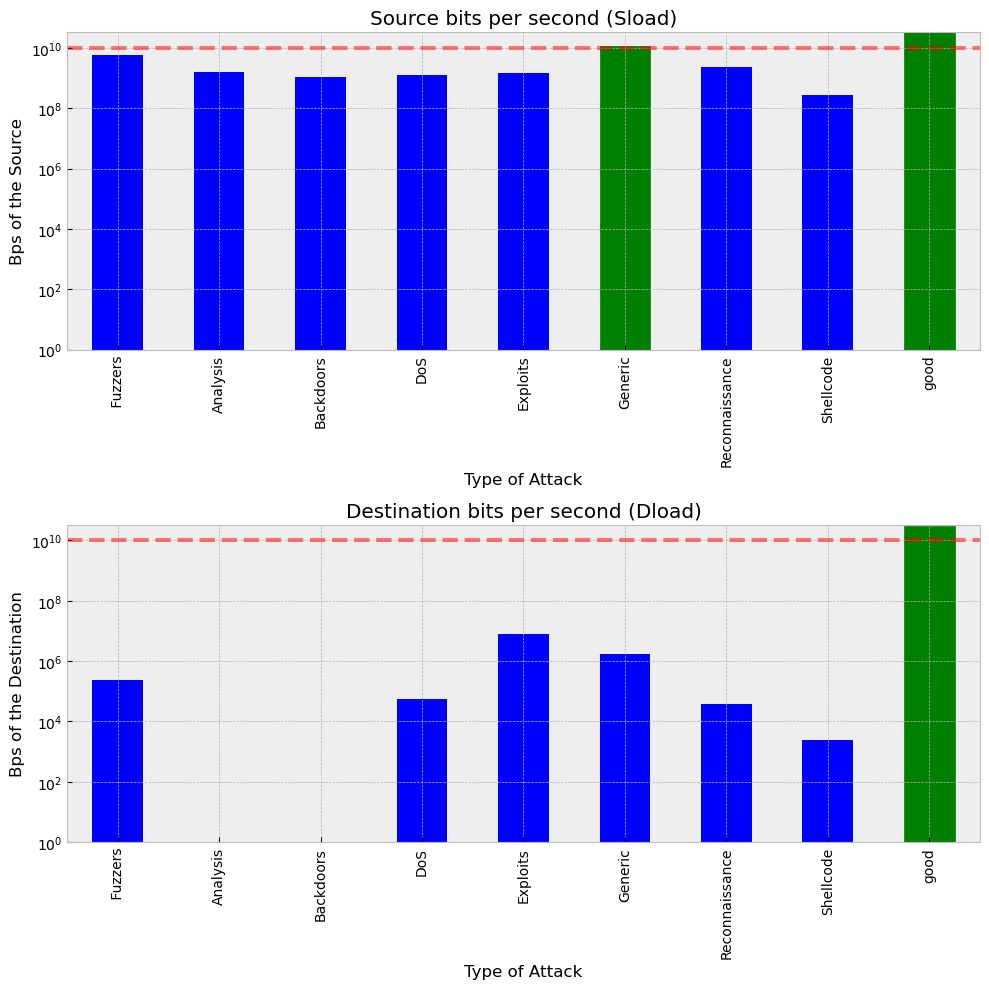

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10))  # 2 filas, 1 columna

# Grafico vel_acum_sload en el primer subgráfico (axs[0])
vel_acum_sload.plot(kind='bar', ax=axs[0], color='blue', label='Sload')

# Umbral para diferenciar los protocolos
umbral = 1e10

axs[0].set_title('Source bits per second (Sload)')
axs[0].set_ylabel('Bps of the Source')
axs[0].set_xlabel('Type of Attack')
axs[0].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x
axs[0].set_yscale('log')  # Establecer escala logarítmica en el eje y
axs[0].grid(True)  # Mostrar cuadrícula en el gráfico
axs[0].axhline(umbral, color='red', linestyle='--', alpha=0.5, linewidth=3, label='Umbral')

# Cambio el color de las barras que superan el umbral
for barra in axs[0].patches:
    if barra.get_height() > umbral:
        barra.set_color('green')

# Grafico vel_acum_dload en el segundo subgráfico (axs[1])
vel_acum_dload.plot(kind='bar', ax=axs[1], color='blue', label='Dload')

axs[1].set_title('Destination bits per second (Dload)')
axs[1].set_ylabel('Bps of the Destination')
axs[1].set_xlabel('Type of Attack')
axs[1].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x
axs[1].set_yscale('log')  # Establecer escala logarítmica en el eje y
axs[1].grid(True)  # Mostrar cuadrícula en el gráfico
axs[1].axhline(umbral, color='red', linestyle='--', alpha=0.5, linewidth=3, label='Umbral')

# Calculo el máximo de los valores de vel_acum_sload y vel_acum_dload para establecer el mismo fondo de escala en ambos subgráficos
max_sload = vel_acum_sload.max()
max_dload = vel_acum_dload.max()
ymax = max(max_sload, max_dload)

# Establecer el mismo fondo de escala en ambos subgráficos
for ax in axs:
    ax.set_ylim(1, ymax)  # Establecer el mismo límite superior en ambos subgráficos

# Cambio el color de las barras que superan el umbral
for barra in axs[1].patches:
    if barra.get_height() > umbral:
        barra.set_color('green')    
    
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()

### Visualizo Time to Live
Esto es en ambas direcciónes, fuente y destino. Se observa que los paquetes con destino a la fuente tienen gran cantidad de paquetes con tiempo de vida muy pequeño, el resto del patrón coincide con el sentido fuente al destino.

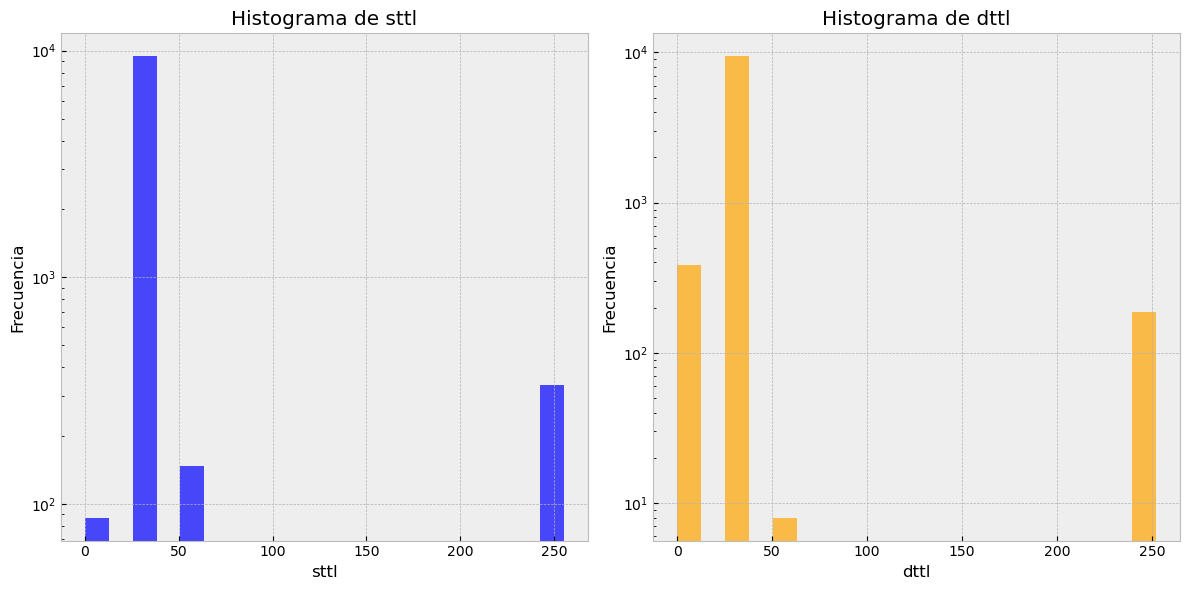

In [37]:
# Creo una figura y dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graficar el histograma para el campo 'sttl' en el primer subgráfico
axs[0].hist(df['sttl'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Histograma de sttl')
axs[0].set_xlabel('sttl')
axs[0].set_ylabel('Frecuencia')
axs[0].set_yscale('log')  # Establecer escala logarítmica en el eje y

# Graficar el histograma para el campo 'dttl' en el segundo subgráfico
axs[1].hist(df['dttl'], bins=20, color='orange', alpha=0.7)
axs[1].set_title('Histograma de dttl')
axs[1].set_xlabel('dttl')
axs[1].set_ylabel('Frecuencia')
axs[1].set_yscale('log')  # Establecer escala logarítmica en el eje y

plt.tight_layout()  # Ajustar el diseño del gráfico para evitar solapamiento
plt.show()  # Mostrar el gráfico

### Perdida de Paquetes
Visualizamos la pérdida de paquetes en ambas direcciones y según el tipo de ataque.
En coincidencia con la hipótesis, para el caso de paquetes de la Fuente, vemos que la cantidad de paquetes perdidos o retransmitidos es mayor en el caso de trafico malicioso (salvo Exploits). Para el caso inverso, paquetes desde el Destino, la situación es inversa. 

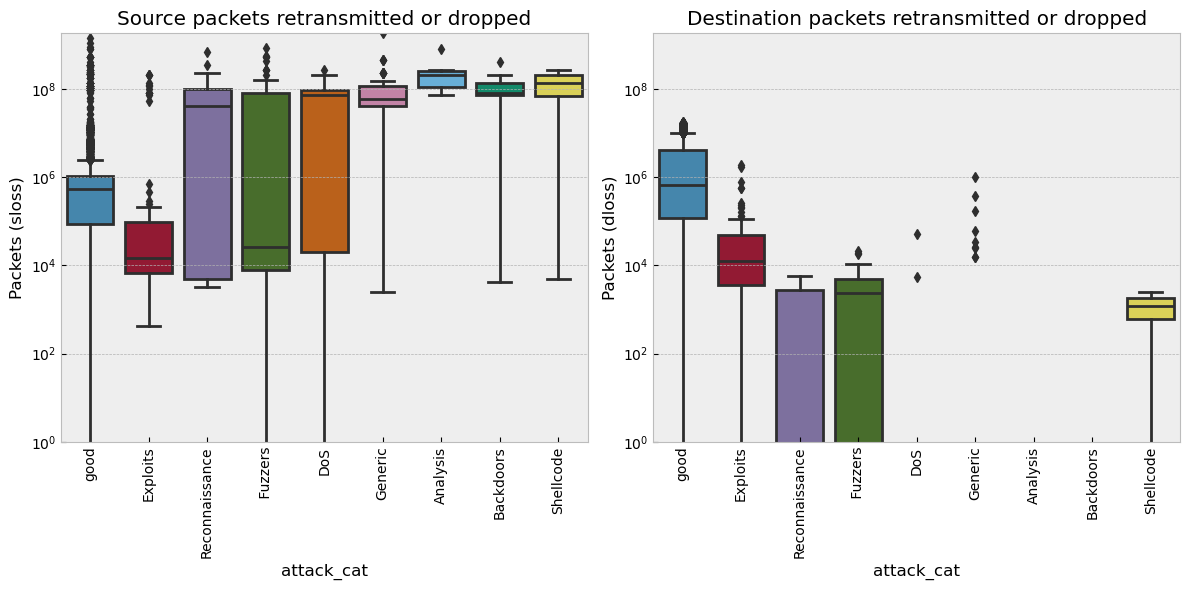

In [38]:
# Crear una figura y dos subgráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Graficar el boxplot para el campo 'sloss' en el primer subgráfico
sns.boxplot(x='attack_cat', y='Sload', data=df, ax=axs[0])
axs[0].set_title('Source packets retransmitted or dropped')
axs[0].set_ylabel('Packets (sloss)')
axs[0].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x
#axs[0].set_yscale('log')  # Establecer escala logarítmica en el eje y

# Graficar el boxplot para el campo 'dloss' en el segundo subgráfico
sns.boxplot(x='attack_cat', y='Dload', data=df, ax=axs[1])
axs[1].set_title('Destination packets retransmitted or dropped')
axs[1].set_ylabel('Packets (dloss)')
axs[1].tick_params(axis='x', rotation=90)  # Rotar etiquetas del eje x
#axs[1].set_yscale('log')  # Establecer escala logarítmica en el eje y

# Calcular el máximo de los valores de Sload y Dload para establecer el mismo fondo de escala en ambos subgráficos
max_sload = df['Sload'].max()
max_dload = df['Dload'].max()
ymax = max(max_sload, max_dload)

# Establecer el mismo fondo de escala en ambos subgráficos
for ax in axs:
    ax.set_yscale('log')  # Establecer escala logarítmica en el eje y
    ax.set_ylim(1, ymax)  # Establecer el mismo límite superior en ambos subgráficos

plt.tight_layout()  # Ajustar el diseño del gráfico para evitar solapamiento
plt.show()  # Mostrar el gráfico

### Visualizamos Cantidad de Ataques
Según el tipo de ataque verificamos una variación en la cantidad de éstos. Por ello algunos pueden ser más frecuentes.
En contra a nuestra hipótesis, el tráfico malisioso DoS no es el principal para nuestro caso como habíamos esperado.

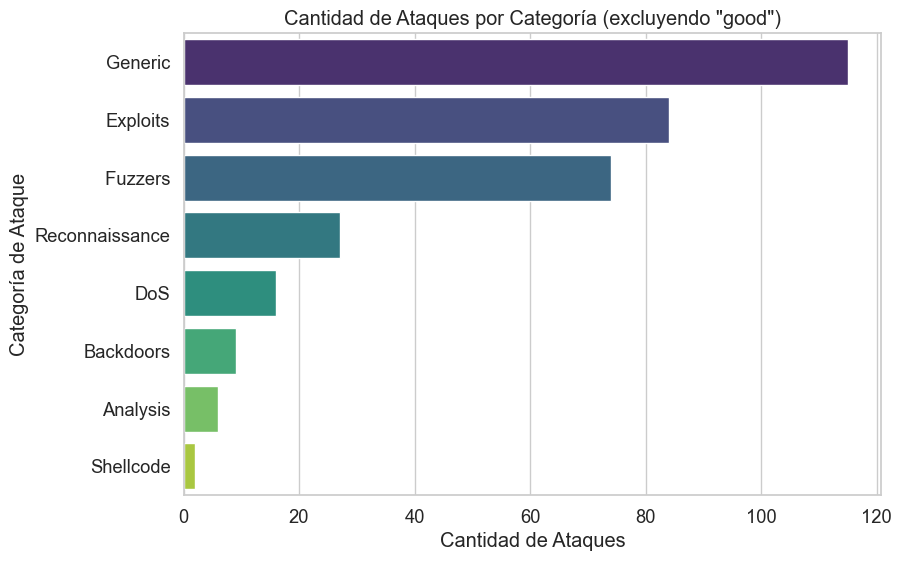

In [39]:
# Filtrar el DataFrame para excluir la categoría "good"
df_sin_good = df[df['attack_cat'] != 'good']

# Contar la cantidad de ataques por categoría
conteo_por_categoria = df_sin_good['attack_cat'].value_counts()

# Crear el gráfico de pastel con seaborn
plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")
sns.color_palette("Set2")
sns.set_context("notebook", font_scale=1.2)
sns.barplot(x=conteo_por_categoria.values, y=conteo_por_categoria.index, palette="viridis")

plt.title('Cantidad de Ataques por Categoría (excluyendo "good")')
plt.xlabel('Cantidad de Ataques')
plt.ylabel('Categoría de Ataque')
plt.show()


### Visualizo Cantidad de Ataques por Tipo y Protocolo
Profundizando el gráfico anterior podemos agregar el protocolo y observar algunas concentraciones.
En coincidencia con nuestra hipótesis, los protocolos que concentran mayor cantidad de ataques son TCP y UDP.

In [40]:
# Contar la cantidad de ataques por tipo de protocolo y categoría de ataque
ataques_por_protocolo = df_sin_good.groupby(['proto', 'attack_cat']).size().reset_index(name='Cantidad')

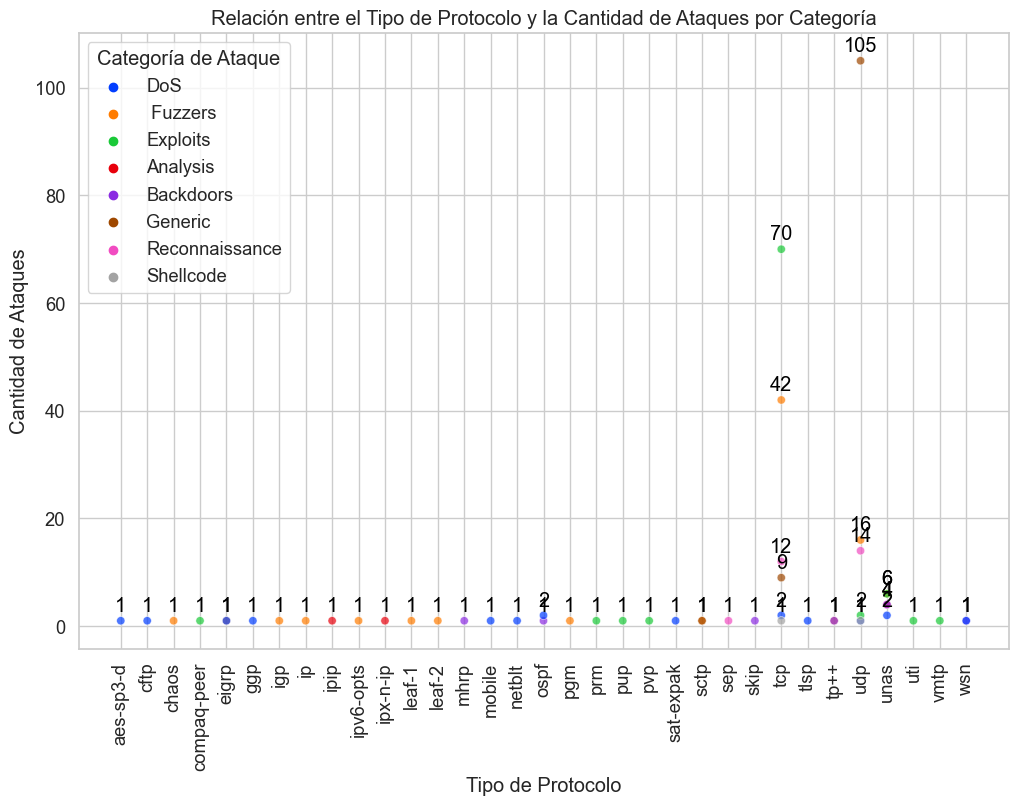

In [41]:
# Crear el gráfico de dispersión con Seaborn
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=ataques_por_protocolo, x='proto', y='Cantidad', hue='attack_cat', palette='bright', alpha=0.7)

plt.title('Relación entre el Tipo de Protocolo y la Cantidad de Ataques por Categoría')
plt.xlabel('Tipo de Protocolo')
plt.ylabel('Cantidad de Ataques')
plt.xticks(rotation=90)  # Rotar etiquetas del eje x a 90 grados
plt.legend(title='Categoría de Ataque')

# Agregar etiquetas de valores junto a cada burbuja
for index, row in ataques_por_protocolo.iterrows():
    x = row['proto']
    y = row['Cantidad']
    offset = 1  # Desplazamiento para evitar superposición
    scatter_plot.text(x, y+offset, str(row['Cantidad']), color='black', ha='center', va='bottom')

plt.show()